# Gary Vee's Tweet Analysis

Use the below commented code in the comand line to scrape tweets:

In [37]:
#snscrape --jsonl --progress --since 2020-01-01 twitter-search "from:garyvee until:2020-12-31" > Gary_data.json

In [80]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

Reading and Filtering the data we need:

In [81]:
pd.set_option('display.max_colwidth', -1)

#Read the data
df = pd.read_json('Gary_data.json', lines=True)
#Filter the data
df= df.filter(['content'])
df

,content
0,https://t.co/JcuKULHTF3\n\nWho saw it? Whatya agree with? https://t.co/eoSE4i68uB
1,Meet the New King of Twitch: TheGrefg via @137pm https://t.co/3wIZ5UHfBg
2,@DavidNovakOGO this makes me smile
3,ALLOW ME TO RE-INTRODUCE: https://t.co/RFQgukhUSm https://t.co/LLFqgMS6V5
4,@R_Weaver17 least confused person on earth
...,...
7094,Yup https://t.co/x9W8OEZpyp
7095,Hope today is the best day ever 💙
7096,How to Build Confidence and Self-esteem | #6 of 2019 Top Podcasts \nhttps://t.co/bfOyAc7UEO
7097,@_Patrick_Dennis @EmpathyWines @winetexts Boom


Cleaning Data:

In [108]:
#Removing links
df['content'] = df['content'].replace(r'http\S+', '', regex=True).replace(r'@\S+', '', regex=True)

#Removing puntuations
df['content'] = df['content'].str.replace("[^a-zA-Z# ]", "")

#Removing Small Words (less than 3 letters)
def rsw(text):
    text = text.split(' ')
    text = [x for x in text if len(x)>3]
    return ' '.join(text)

df['content'] = df['content'].apply(lambda x: rsw(x))

#Lowercase
df['content'] = df['content'].apply(lambda x: x.lower())

#Removing NA and duplicates
df.replace(' ', np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.drop_duplicates(keep=False, inplace=True)


df

,content
1,meet king twitch thegrefg
2,makes smile
3,allow reintroduce
4,least confused person earth
6,means alot
...,...
5572,favorite podcasts last year sitting talked depth confidence building selfesteem kids
5573,whats something help help thread school billeting board hope helps many
5574,kindness word
5575,hope today best


In [118]:
#Removing stopwords
stopwords = set(STOPWORDS)
stopwords.update(["GaryVee", "dont", "watch", "your", "video", "link", "what", "agree", "need", "sorry", "really"])
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
#df.style.set_properties(subset=['content'], **{'width': '300px'})
df

,content
1,meet king twitch thegrefg
2,makes smile
3,allow reintroduce
4,least confused person earth
6,means alot
...,...
5572,favorite podcasts last year sitting talked depth confidence building selfesteem kids
5573,whats something help help thread school billeting board hope helps many
5574,kindness word
5575,hope today best


#### WordCloud

In [125]:
#Joinings the dataframe into a long string
text = " ".join(twt for twt in df.content)
print ("There are {} words in the cleaned tweets dataset.".format(len(text)))

There are 167196 words in the cleaned tweets dataset.


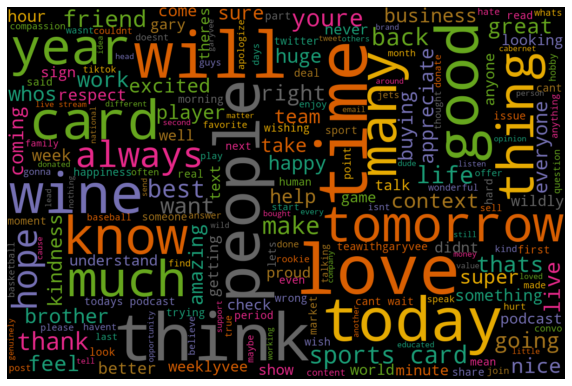

In [126]:
#WordCloud
wordcloud = WordCloud(width=1200, height=800, random_state=22, max_font_size=150, relative_scaling=0.5, colormap='Dark2').generate(text)

#Display the generated image:
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Let's make it look better:

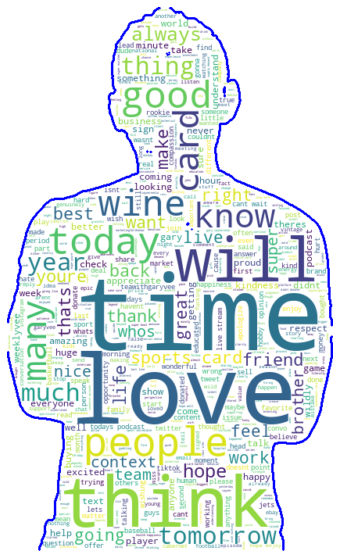

In [122]:
from PIL import Image
#Adding a mask to the wordcloud
mask = np.array(Image.open("twt.png"))

#Mask transforming the array values
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
    

#Transform mask into a new one that will work with the function:
tmask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)

for i in range(len(mask)):
    tmask[i] = list(map(transform_format, mask[i]))

#WordCloud
wc = WordCloud(background_color="white", max_words=700, mask=tmask,
              contour_width=3, contour_color='blue')

#Generate the wordcloud
wc.generate(text)

#Display the word cloud
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [123]:
wc.to_file("GaryVeeWC.png")

#### Some extra Analysis

In [124]:
import collections
from collections import Counter

x = []
for txt in df.iterrows():
    x += txt[1]['content'].split(' ')

#Top Common Words
topwords = Counter(x).most_common()
topwords[:5]

[('love', 200), ('will', 195), ('think', 190), ('time', 183), ('hope', 159)]

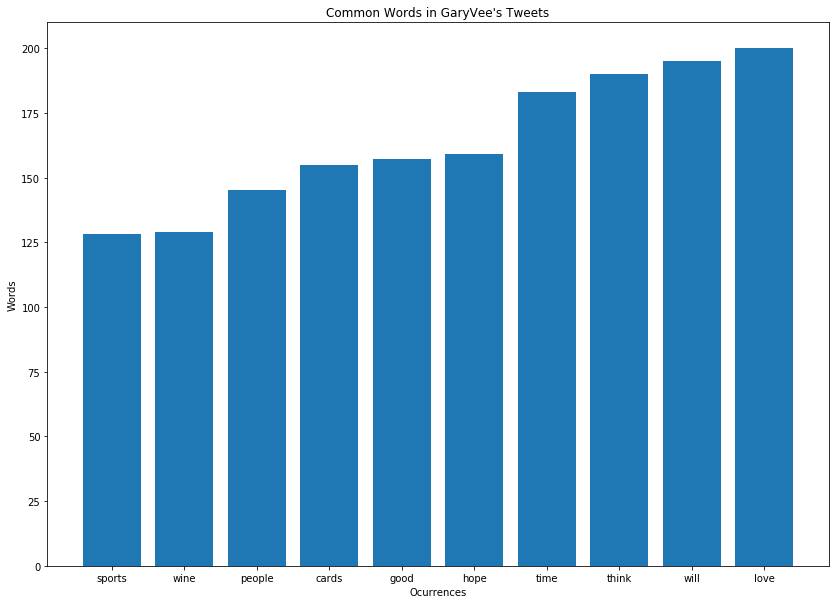

In [127]:
#Visualizing the Common Words
top = topwords[:10]
top.reverse()
x , y = zip(*(top))

plt.figure(figsize=(14, 10))
plt.bar(x, y)

plt.title("Common Words in GaryVee's Tweets")
plt.xlabel('Ocurrences')
plt.ylabel('Words')
plt.show()

In [134]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings("ignore")

#Sentiment Analysis
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity = sid.polarity_scores(text)
    return 'neg' if polarity['neg'] > polarity['pos'] else 'pos'

sentiments_using_SIA = df.content.apply(lambda text: fetch_sentiment_using_SIA(text))

sp = pd.DataFrame(sentiments_using_SIA.value_counts())
sp

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mishals/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,content
pos,3853
neg,469


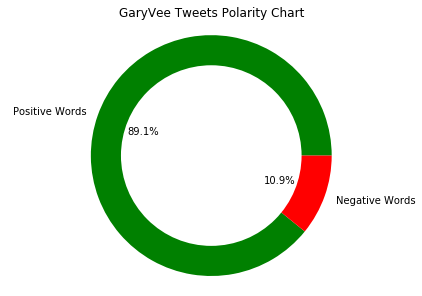

In [138]:
#Visualizing the results
label = 'Positive Words','Negative Words'
color = ['green', 'red']

plt.pie(sp, labels=label, autopct='%1.1f%%', colors=color)

#draw center circle hole
cc = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(cc)

#display
plt.tight_layout()
plt.title('GaryVee Tweets Polarity Chart')
plt.axis('equal')
plt.show()